In [12]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import linalg as LA
import sklearn
from sklearn import metrics
from sklearn import preprocessing


usr_dir="Raw_data/Amp/"
user_file=usr_dir+"U"+str(20)+"_LIHF_itd_file.csv"
dataset=pd.read_csv(user_file,header=None)
array=dataset.values

In [13]:
row_no=array.shape[0]
col_no=array.shape[1]

print(row_no)
print(col_no)
# normalize the data attributes
dataframe = preprocessing.normalize(array[:,0:col_no-1])
print("dataframe row no=",dataframe.shape[0],",dataframe col no=",dataframe.shape[1])
#X_train=dataframe[0:int(row_no*0.6),0:col_no-1]
X_train=dataframe[:,0:col_no-1]
print(X_train.shape)
X_test=dataframe[:,0:col_no-1]
print(X_test.shape)

182
759
dataframe row no= 182 ,dataframe col no= 758
(182, 758)
(182, 758)


In [17]:
# this is the input size, size of each row. last column is discarded as it represents label
INPUT_SIZE=col_no-1
# this is(16) the size of our encoded representations
ENCODING_SIZE = 10
# this is our input placeholder
input_row = Input(shape=(INPUT_SIZE,))


encoded = Dense(12, activation='relu')(input_row)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(ENCODING_SIZE, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(INPUT_SIZE, activation='relu')(decoded)

autoencoder = Model(input_row, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder_train=autoencoder.fit(X_train, X_train, epochs=50, batch_size=10, shuffle=True, validation_split=0.3)

Train on 127 samples, validate on 55 samples
Epoch 1/50
127/127 [==============================] - 2s 12ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 2/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/50
127/127 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/50
127/127 [==============================] - 0s 1ms/step - loss: 9.6757e-04 - val_loss: 0.0010
Epoch 5/50
127/127 [==============================] - 0s 1ms/step - loss: 9.4718e-04 - val_loss: 9.9097e-04
Epoch 6/50
127/127 [==============================] - 0s 2ms/step - loss: 9.3382e-04 - val_loss: 9.7533e-04
Epoch 7/50
127/127 [==============================] - 0s 1ms/step - loss: 9.1782e-04 - val_loss: 9.5736e-04
Epoch 8/50
127/127 [==============================] - 0s 1ms/step - loss: 8.9956e-04 - val_loss: 9.4120e-04
Epoch 9/50
127/127 [==============================] - 0s 1ms/step - loss: 8.7499e-04 - val_loss: 9.1592e-04
Epoch 10/5

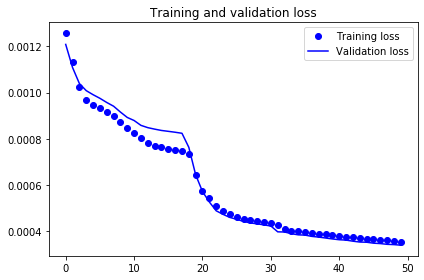

In [18]:
# compute graph for Training loss and validation loss
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
#print(val_loss)
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig("loss_user_try.jpg")